### Tìm hiểu dữ liệu

In [1]:
# khai báo thêm các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

train = pd.read_csv(r"D:\Project\data\BigMartSales Prediction\Train.csv")
test = pd.read_csv(r"D:\Project\data\BigMartSales Prediction\Test.csv")

display(train.head())
display(test.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [3]:
train.Item_Outlet_Sales.value_counts()

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

In [4]:
print('số dòng và số trường của bộ train lần lượt là',train.shape)
print('số dòng và số trường của bộ test lần lượt là',test.shape)

số dòng và số trường của bộ train lần lượt là (8523, 12)
số dòng và số trường của bộ test lần lượt là (5681, 11)


#### ==> mục tiêu của project này là dự đoán trường 'Item_Outlet_Sales' có 3493 giá trị khác nhau và kiểu dữ liệu là int64. nên chúng ta sẽ chọn kiểu mô hình là dự đoán (regression)

In [5]:
# Chúng ta nên kết hợp bộ train và test để có thể phân tích và dự đoán tốt hơn


# tạo thêm một cột 'Item_Outlet_Sales' cho cột test gán tất cả giá trị bằng 0
test['Item_Outlet_Sales'] = 0

# chúng ta sẽ tạo thêm cho bộ train và test một cột 'source' để có thể phân biệt dữ liệu của 2 bộ này
train['source'] = 'train'
test['source'] = 'test'

# gộp 2 bộ lại với nhau
df = pd.concat([train, test], sort = False, ignore_index = True)

# sau đó tách ra để kiểm tra
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0000,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0000,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,0.0000,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,0.0000,test


In [8]:
# kiểm tra dữ liệu bị thiếu

display(round((df.isnull().sum()/df.shape[0] * 100), 2))

Item_Identifier               0.00
Item_Weight                  17.17
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                  28.27
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales             0.00
source                        0.00
dtype: float64

In [9]:
for i in list(df.columns):
    print(df[i].value_counts(), '\n')

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64 

17.600    135
12.150    127
10.500    123
13.650    115
11.800    113
         ... 
7.640       7
5.905       7
7.850       6
4.615       6
9.035       6
Name: Item_Weight, Length: 415, dtype: int64 

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64 

0.000000    879
0.076841      3
0.077011      3
0.077169      3
0.076792      3
           ... 
0.162572      1
0.014826      1
0.058034      1
0.043786      1
0.104720      1
Name: Item_Visibility, Length: 13006, dtype: int64 

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      7

#### ==> nhìn vào thống kê trên chúng ta có thể thấy: dữ liệu bị thiếu ở cột 'Item_Weight'(17,17%) và 'Outlet_Size'(28,27%)

#### ==> có một số giá trị không hợp lý như cột 'Item_Víibility' với giá trị 0 (5681/14204)

In [10]:
# kiểm tra giá trị ngoại lai, nhiễu

#tạo một dataframe mới lọc những giá của Item_Visibility lớn hơn 0
df1 = df[df.Item_Visibility > 0]

stats = df1.describe()
for i in stats.columns:
    meanV, stdV = stats.loc['mean', i], stats.loc['std', i]
    minV, maxV = stats.loc['min', i], stats.loc['max', i]
    q1, q2, q3 = stats.loc['25%', i], stats.loc['50%', i], stats.loc['75%', i]
    iqr = q3 - q1
    ConfRange1 = [round(meanV - 3 * stdV,2), round(meanV + 3 * stdV, 2)]
    ConfRange2 = [round(q1 - 1.5 * iqr,2), round(q3 + 1.5 * iqr, 2)]
    print(f'{i}: \n\t min là {minV}, max là {maxV} \n\t confident range 1 là {ConfRange1} và range 2 là {ConfRange2}')

Item_Weight: 
	 min là 4.555, max là 21.35 
	 confident range 1 là [-1.15, 26.75] và range 2 là [-3.35, 28.81]
Item_Visibility: 
	 min là 0.003574698, max là 0.328390948 
	 confident range 1 là [-0.08, 0.22] và range 2 là [-0.07, 0.2]
Item_MRP: 
	 min là 31.29, max là 266.8884 
	 confident range 1 là [-44.93, 327.14] và range 2 là [-43.43, 323.43]
Outlet_Establishment_Year: 
	 min là 1985.0, max là 2009.0 
	 confident range 1 là [1972.7, 2022.96] và range 2 là [1961.5, 2029.5]
Item_Outlet_Sales: 
	 min là 0.0, max là 13086.9648 
	 confident range 1 là [-3785.48, 6400.42] và range 2 là [-3245.77, 5409.62]


In [11]:
# kiểm tra phân phối của dữ liệu

df.skew()

Item_Weight                  0.101309
Item_Visibility              1.195175
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales            1.544684
dtype: float64

#### ==> lệch ít, toàn bộ đều nhỏ hơn 4

In [13]:
# dữ liệu không nhất quán


# tách những cột mang giá trị phân loại
categorical = [i for i in df.columns if df[i].nunique()< 20 and i != 'source']
print(categorical)
for i in df[categorical]:
    print('\n', df[i].value_counts())

['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

 Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

 Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

 OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

 1985    2439
1987    1553
1999    1550


##### ==> Low Fat & LF & low fat có nghĩa tương tự

#### ==> Regular & reg có nghĩa tương tự

### Tìm hiểu feature

### Trực quan hóa, phân tích đơn biến, hai biến, đa biến

In [14]:
# tách thêm những cột mang giá trị định lượng
numeric = set(df.columns) - set(categorical) - set(['Item_Identifier', 'source', 'Item_Outlet_Sales'])
numeric

{'Item_MRP', 'Item_Visibility', 'Item_Weight'}

		 Item_Fat_Content feature 

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


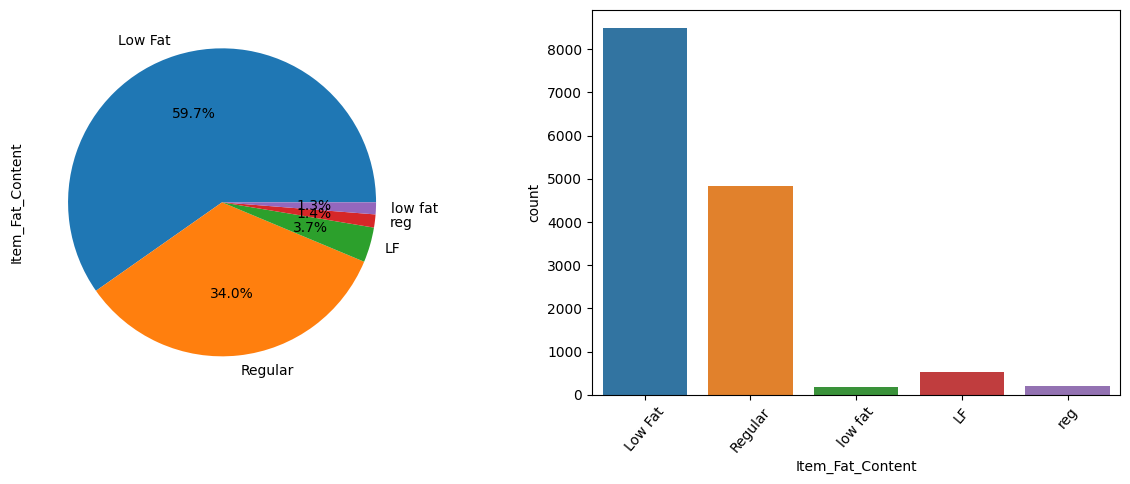

-----------------------------------------------------------------------------------------------------------------
		 Item_Type feature 

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64


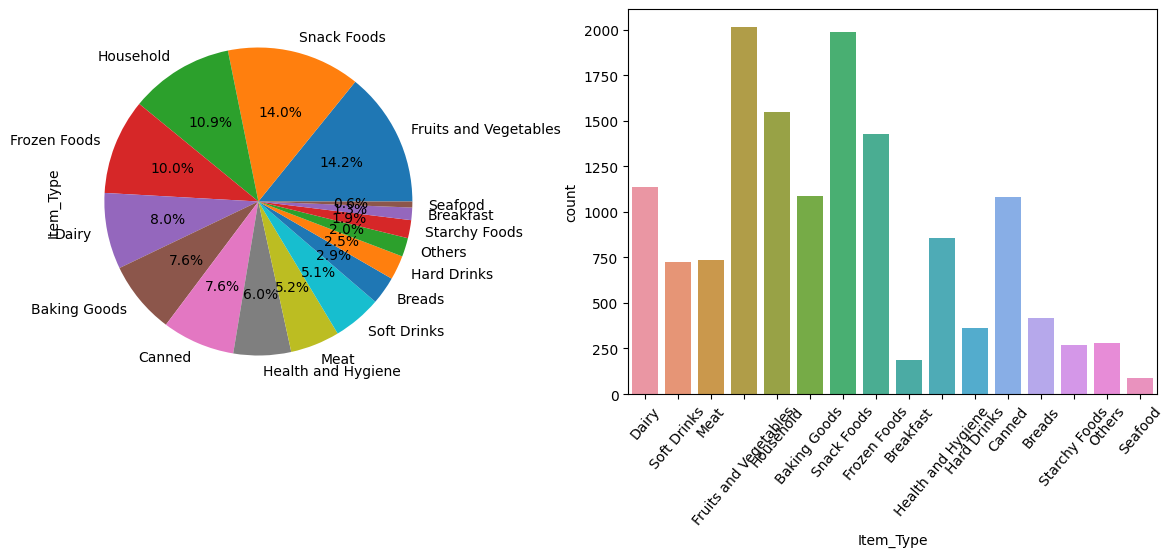

-----------------------------------------------------------------------------------------------------------------
		 Outlet_Identifier feature 

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64


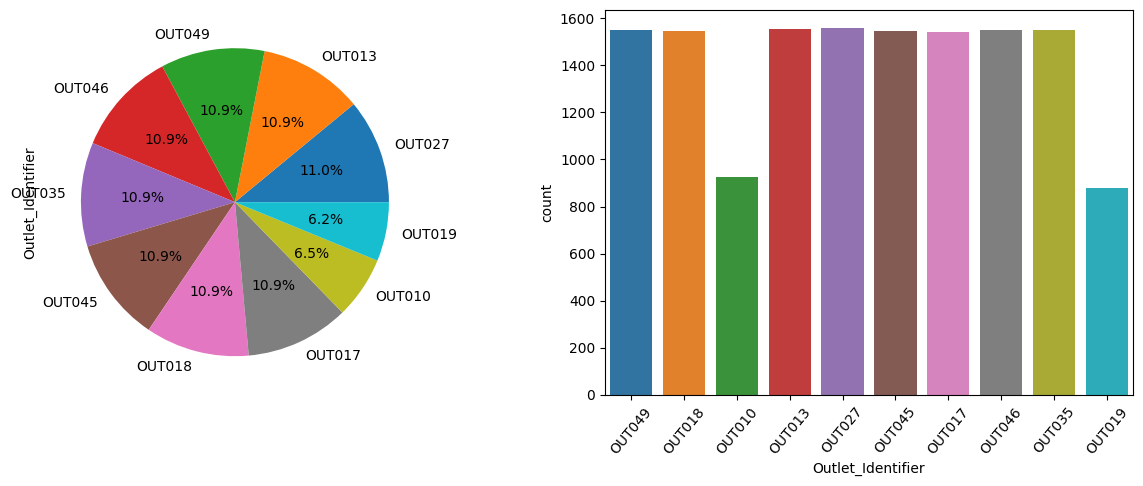

-----------------------------------------------------------------------------------------------------------------
		 Outlet_Establishment_Year feature 

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64


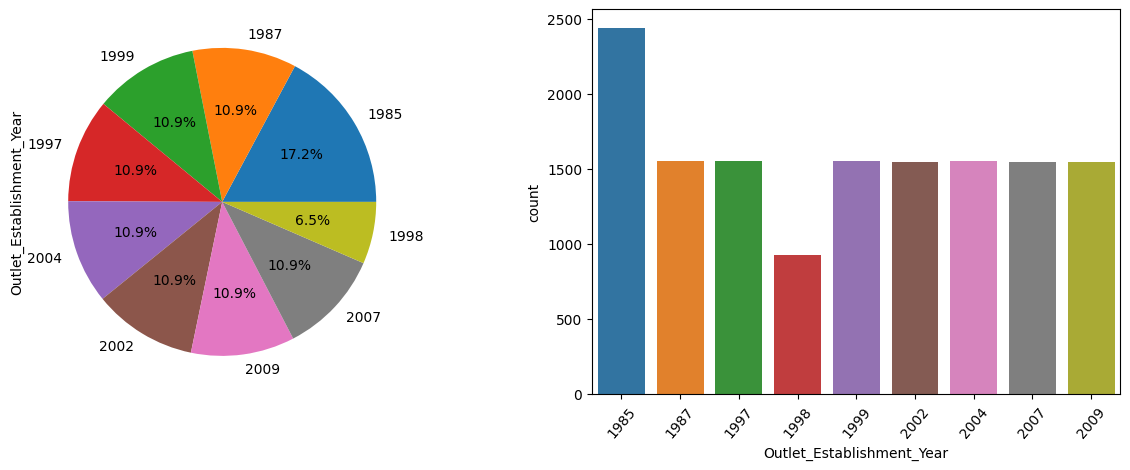

-----------------------------------------------------------------------------------------------------------------
		 Outlet_Size feature 

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64


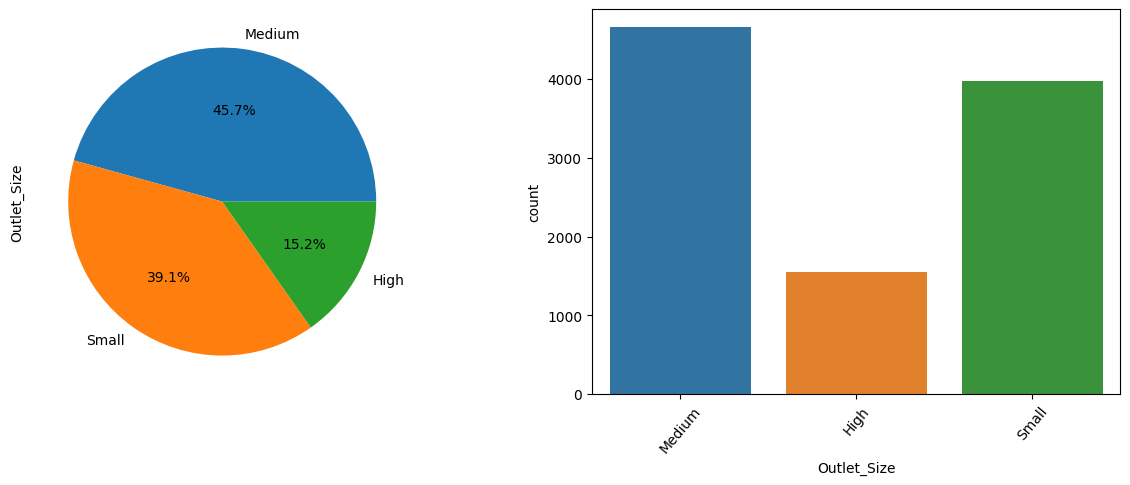

-----------------------------------------------------------------------------------------------------------------
		 Outlet_Location_Type feature 

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64


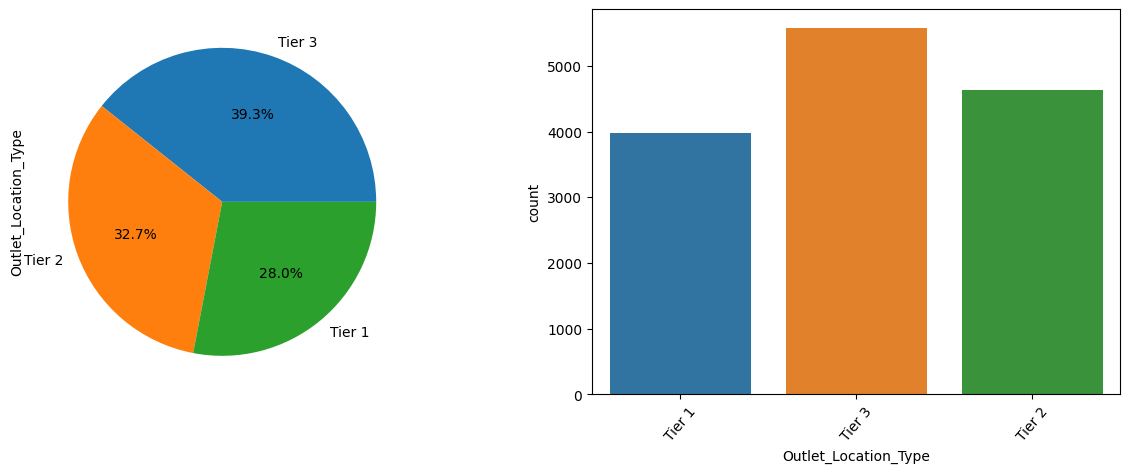

-----------------------------------------------------------------------------------------------------------------
		 Outlet_Type feature 

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64


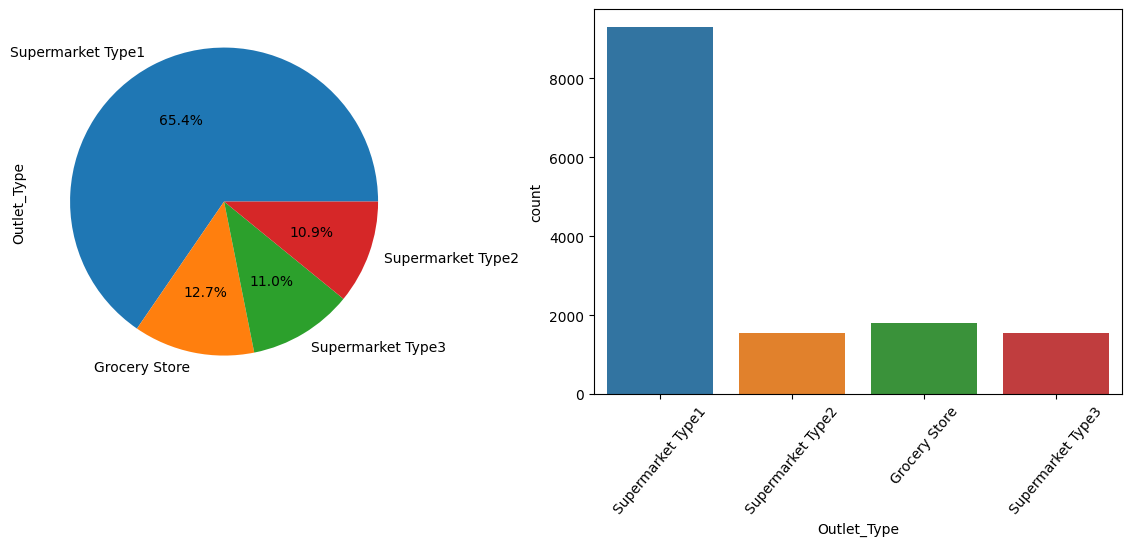

-----------------------------------------------------------------------------------------------------------------


In [15]:
# phân tích đơn biến
# - categorical features nên sử dụng những loại biểu đồ như: bar chart (so sánh), pie (tỉ lệ phần trăm) 
# - numeric features nên sử dụng những loại biểu đồ như: histogram (hình dạng phân phối), boxplot (range and outlier)

for i in df[categorical]:
    print('\t\t', i, 'feature','\n')
    print(df[i].value_counts())
    
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    df[i].value_counts().plot.pie(autopct='%1.1f%%')
    
    plt.subplot(1,2,2)
    sns.countplot(x = df[i])
    plt.xticks(rotation = 50)
    
    plt.show()
    print('-----------------------------------------------------------------------------------------------------------------')

==> cần gom các giá trị của 'low fat' lại. tương tự với 'regular'. sản phẩm 'low fat' nhiều hơn sản phẩm 'regular'.

==> có 10 'outlets' tất cả gần như cân đối trừ 'OUT010' và 'OUT019'

==> 'Fruits and Vegetables' và 'Snack Foods' là 2 loại chiếm hầu hết, ít nhất là 'Seafood'

==> năm 1985 mở nhiều cửa hàng nhất, các năm còn lại gần nhưu cân đối. ít nhất là năm 1998

==> có rất ít của hàng có quy mô lớn, đa phần là tầm trung

==> các của hàng được mở ở thành phố loại 2 nhiều nhất chiếm 39%

==> 65% của 'outlets' là siêu thị loại 1

		 Item_MRP feature 



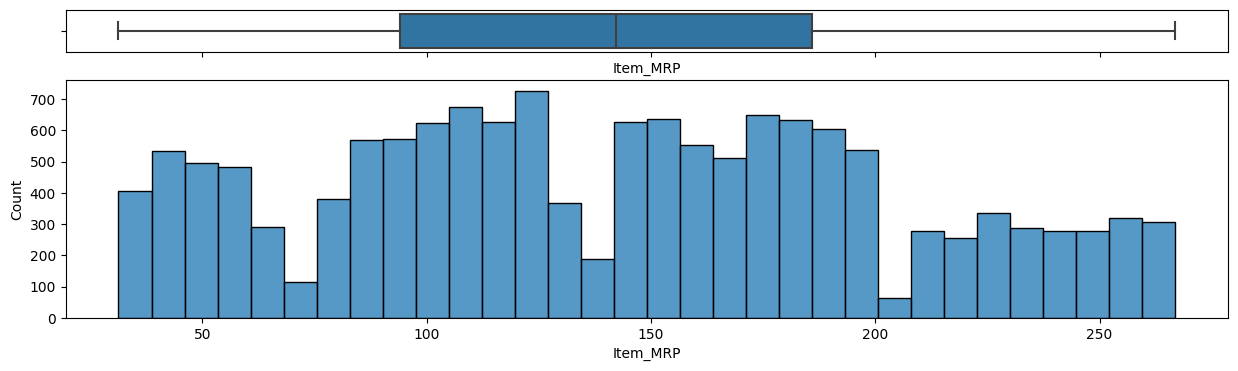

---------------------------------------------------------------------
		 Item_Weight feature 



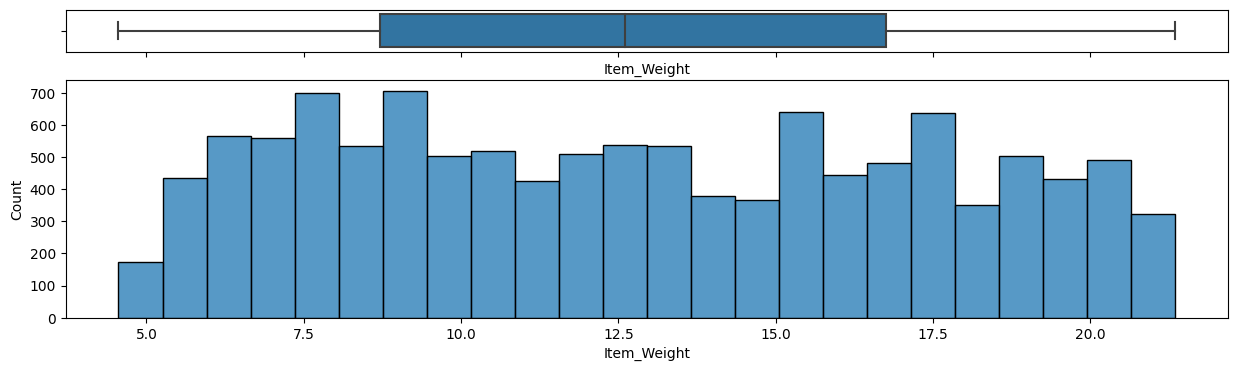

---------------------------------------------------------------------
		 Item_Visibility feature 



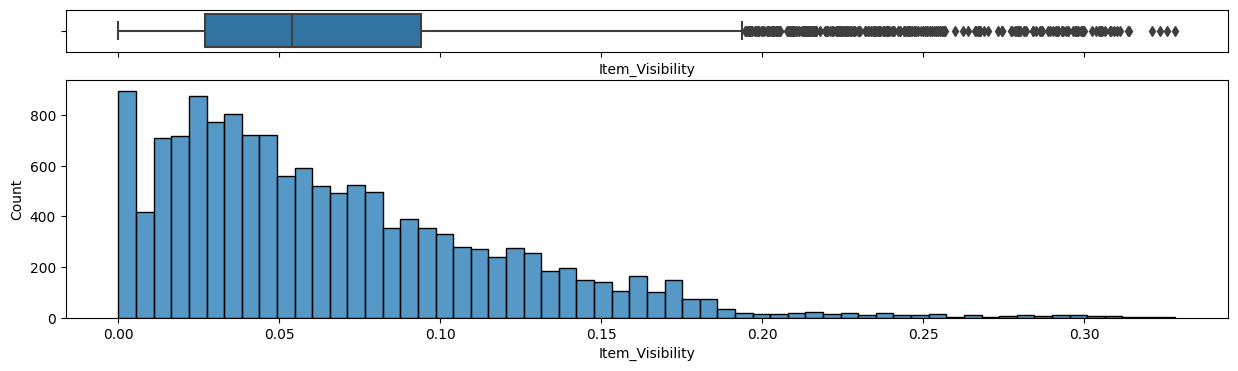

---------------------------------------------------------------------


In [16]:
for i in numeric:
    print('\t\t', i, 'feature','\n')
    f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios': (.15, .85)})
    f.set_figheight(4)
    f.set_figwidth(15)
    sns.boxplot(x = df[i], ax = ax_box)
    sns.histplot(data = df, x = i, ax = ax_hist)
    plt.show()
    print('---------------------------------------------------------------------')

		 Item_MRP feature 



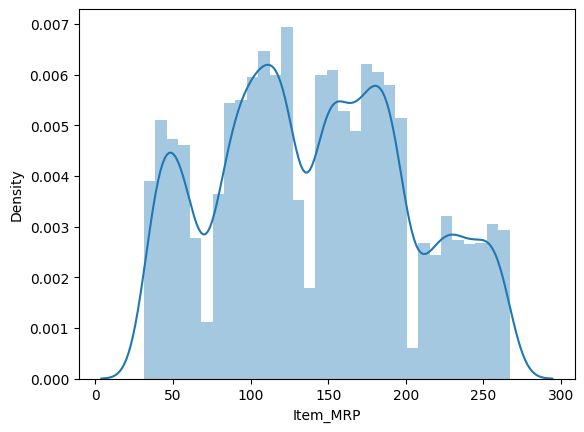

------------------------------------------------------------------------------
		 Item_Weight feature 



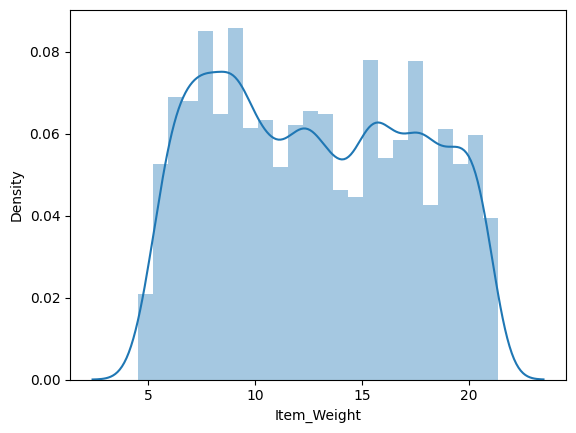

------------------------------------------------------------------------------
		 Item_Visibility feature 



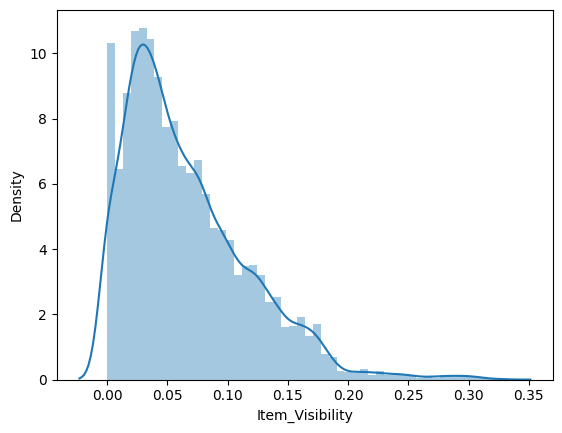

------------------------------------------------------------------------------


In [17]:
for i in numeric:
    print('\t\t', i, 'feature','\n')
    sns.distplot(df[i])
    plt.show()
    print('------------------------------------------------------------------------------')

##### ==> 'Item_Visibility' có thể có giá trị ngoại lai và phân phối đang lệch về bên phải

### ===> Phân tích 2 biến
categorical vs cateforical: stripplot

categorical vs numeric: stripplot

numeric vs numeric: scatter

<Axes: xlabel='Outlet_Location_Type', ylabel='Outlet_Type'>

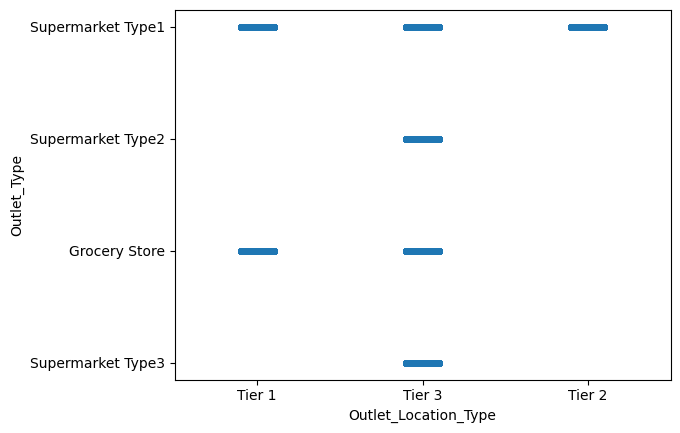

In [18]:
sns.stripplot(x = df['Outlet_Location_Type'],y = df['Outlet_Type'])

==> thành phố loại 3 có đủ các dạng cửa hàng, thành phố loại 1 chỉ có 'Grocery Store' và 'Supermarket Type1' còn thành phố loại 2 chỉ phát triển 'Supermarket Type1'

<Axes: xlabel='Outlet_Size', ylabel='Outlet_Type'>

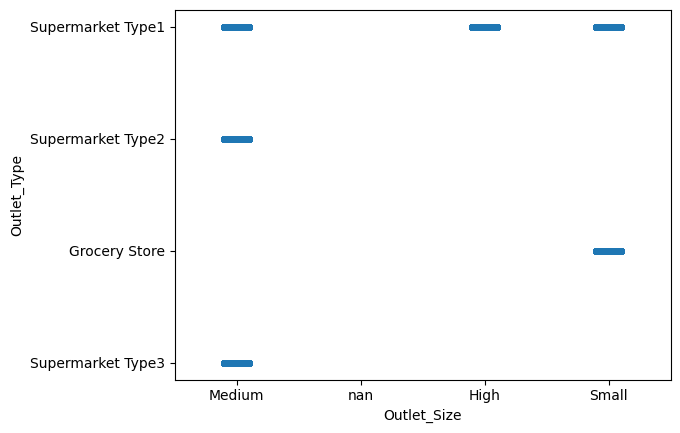

In [20]:
sns.stripplot(x = df['Outlet_Size'], y = df['Outlet_Type'])

==> Siêu thị loại 1 có đủ quy mô trong khi 'Grocery Store' chỉ có quy mô nhỏ và Siêu thị loại 2, Siêu thị loại 3 chỉ có quy mô vừa.

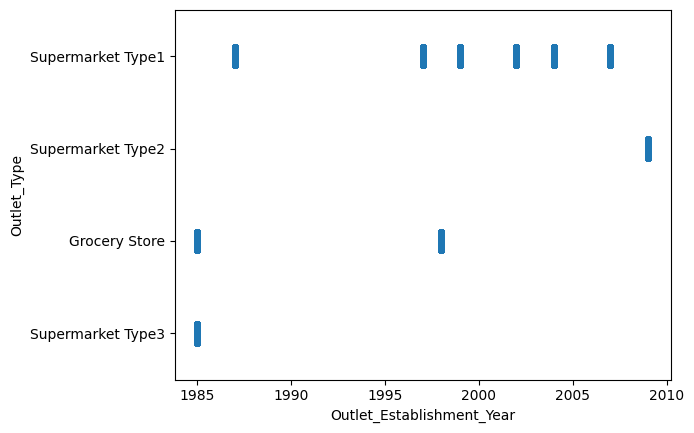

In [21]:
sns.stripplot(x = df['Outlet_Establishment_Year'], y = df['Outlet_Type'])
plt.show()

==> 'supermarket type2' được xây dựng muộn hơn nhiều trong khi các 'grocery store' và siêu thị là loại hình cửa hàng lâu đời nhất.

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Outlet_Location_Type'>

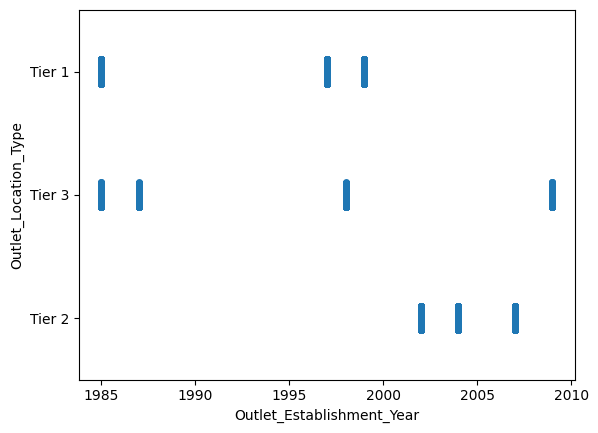

In [22]:
sns.stripplot(x = df['Outlet_Establishment_Year'], y = df['Outlet_Location_Type'])

==> Ở các thành phố cấp 1 và cấp 2, các cửa hàng được thành lập vào năm 1985 trong khi cấp 2 có cửa hàng sau năm 2000

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Outlet_Size'>

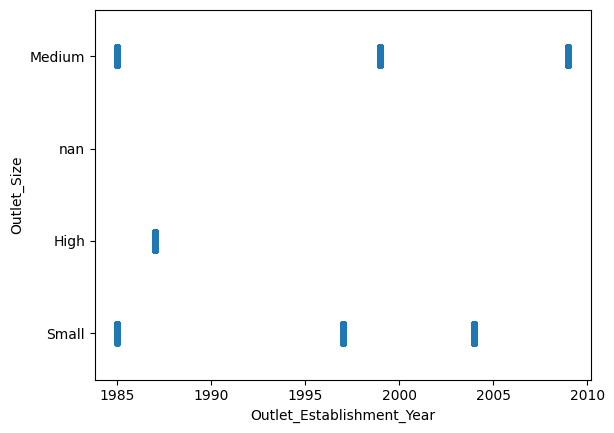

In [23]:
sns.stripplot(x = df['Outlet_Establishment_Year'],y = df['Outlet_Size'])

==> Sau năm 1990 không có cửa hàng quy mô lớn nào được thành lập

<Axes: xlabel='Outlet_Identifier', ylabel='Outlet_Type'>

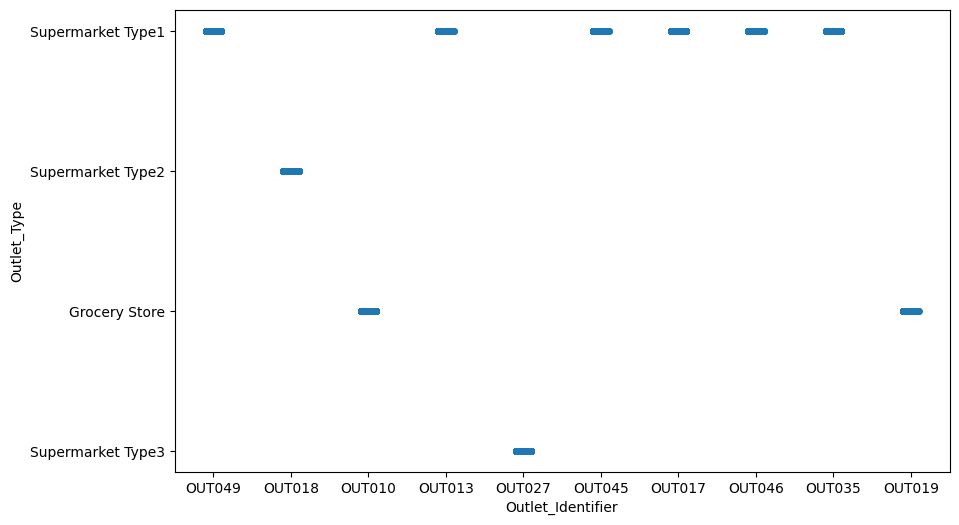

In [24]:
plt.figure(figsize=(10,6))
sns.stripplot(x = df['Outlet_Identifier'],y = df['Outlet_Type'])

==> Chỉ có một mã định danh 'OUT' cho siêu thị 2 và 3 trong khi hầu hết các mã định danh cửa hàng đều thuộc về siêu thị 1

<Axes: xlabel='Outlet_Identifier', ylabel='Outlet_Location_Type'>

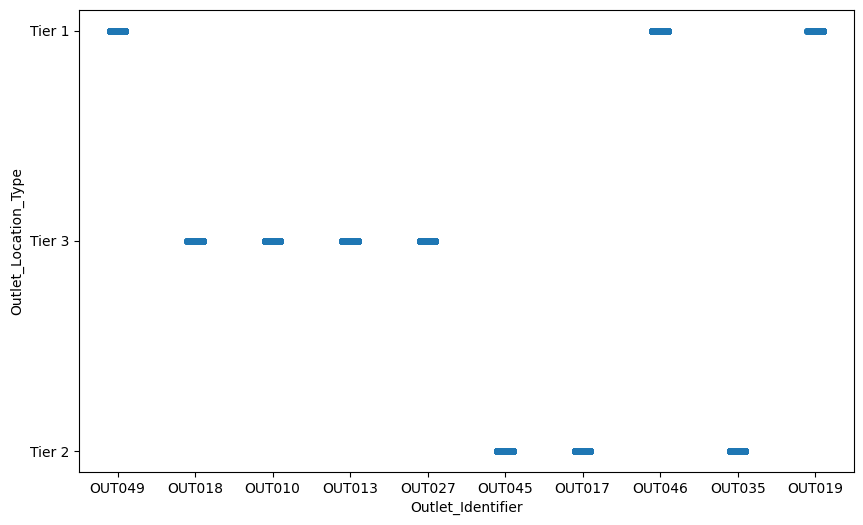

In [26]:
plt.figure(figsize=(10,6))
sns.stripplot(x = df['Outlet_Identifier'],y = df['Outlet_Location_Type'])

<Axes: xlabel='Outlet_Size', ylabel='Outlet_Identifier'>

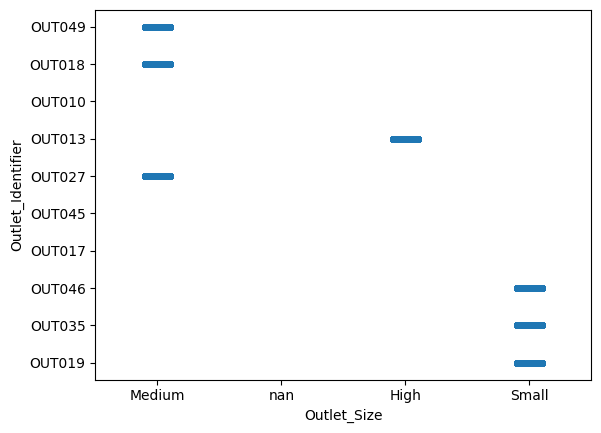

In [27]:
sns.stripplot(x = df['Outlet_Size'],y = df['Outlet_Identifier'])

==> Chỉ có 'Outlet13' có kích thước cửa hàng lớn trong khi các cửa hàng vừa và nhỏ đều có 3 cửa hàng

<Axes: xlabel='Outlet_Identifier', ylabel='Outlet_Establishment_Year'>

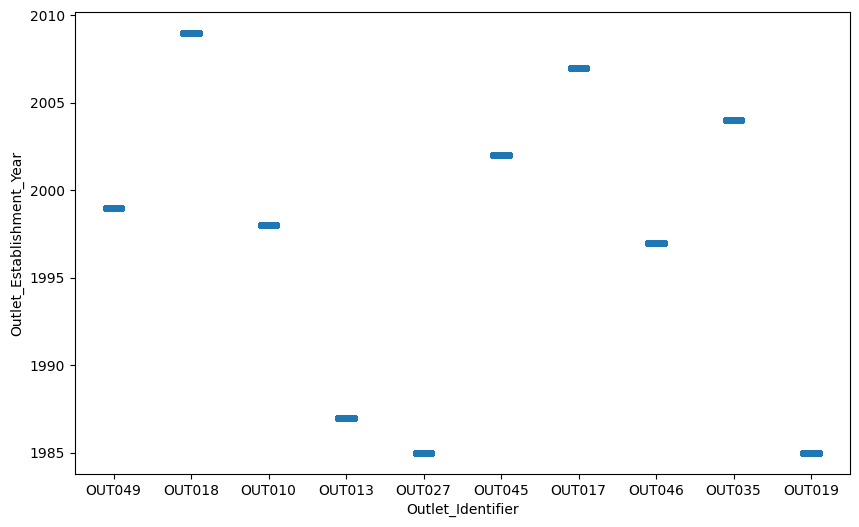

In [28]:
plt.figure(figsize=(10,6))
sns.stripplot(x = df['Outlet_Identifier'],y = df['Outlet_Establishment_Year'])

==> cửa hàng 27 và 19 là mã nhận dạng cửa hàng lâu đời nhất và cửa hàng 18 là cửa hàng mới nhất

<Axes: xlabel='Outlet_Identifier', ylabel='Item_Visibility'>

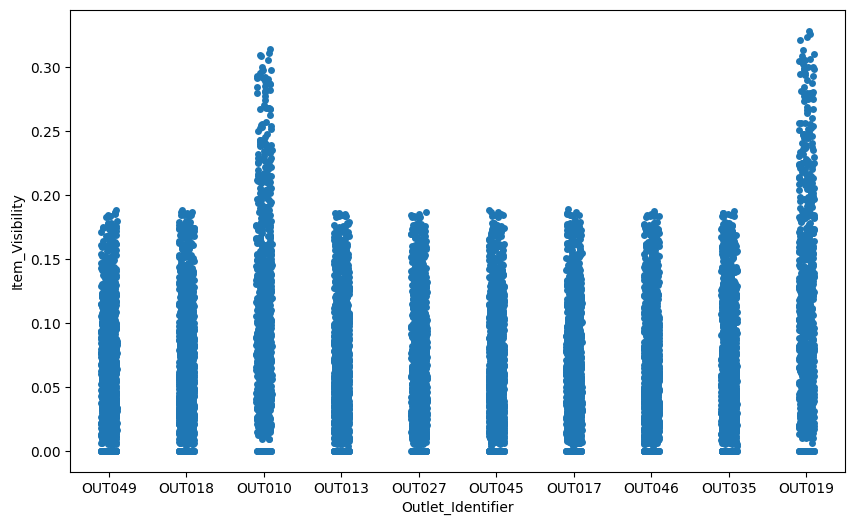

In [29]:
plt.figure(figsize=(10,6))
sns.stripplot(x = df['Outlet_Identifier'],y = df['Item_Visibility'])

<Axes: xlabel='Outlet_Type', ylabel='Item_Visibility'>

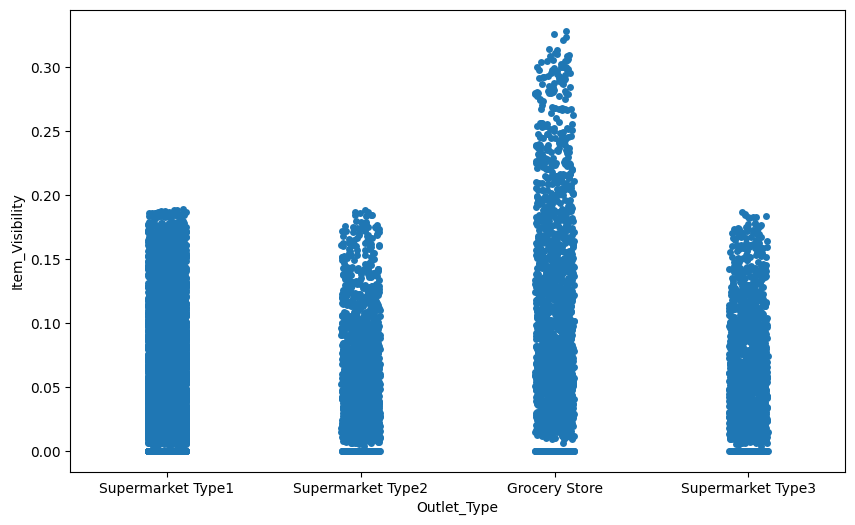

In [30]:
plt.figure(figsize=(10,6))
sns.stripplot(x = df['Outlet_Type'],y =df['Item_Visibility'])

==> Sản phẩm được thấy rõ nhất ở các cửa hàng tạp hóa hơn là bất kỳ siêu thị nào khác

<Axes: xlabel='Outlet_Size', ylabel='Item_Visibility'>

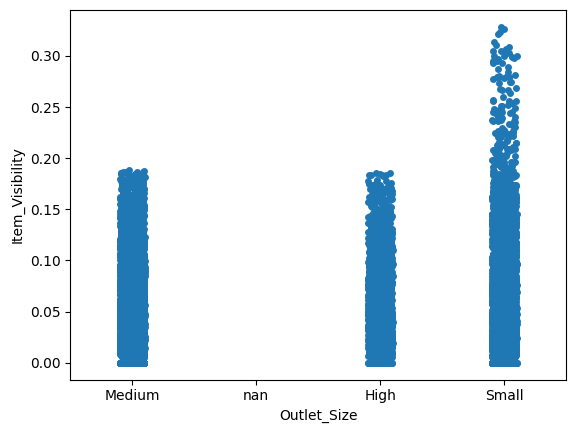

In [31]:
sns.stripplot(x = df['Outlet_Size'],y = df['Item_Visibility'])


==> Cửa hàng nhỏ nhất cung cấp khả năng hiển thị tốt nhất cho sản phẩm

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

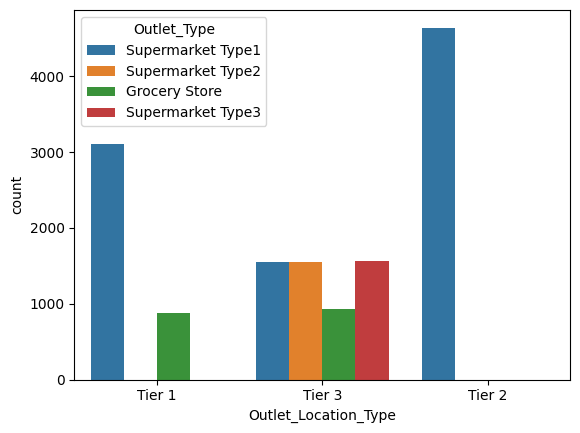

In [32]:

sns.countplot(x = df['Outlet_Location_Type'],hue=df['Outlet_Type'])

==> Các thành phố cấp 2 có số lượng cao nhất. của siêu thị 2 và không có loại cửa hàng nào khác trong khi các thành phố cấp 3 có tất cả các loại cửa hàng với số lượng ít hơn. của mỗi người trong số họ.

<Axes: xlabel='Outlet_Size', ylabel='count'>

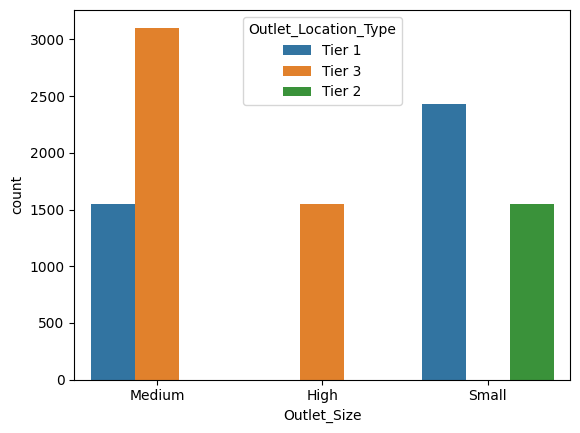

In [33]:
sns.countplot(x = df['Outlet_Size'],hue=df['Outlet_Location_Type'])

==> Các thành phố cấp 3 có số lượng cao nhất của cửa hàng quy mô vừa và thành phố loại 1 có số lượng cửa hàng lớn nhất. các cửa hàng có quy mô nhỏ. Các thành phố cấp 3 có ít nhất. của các cửa hàng

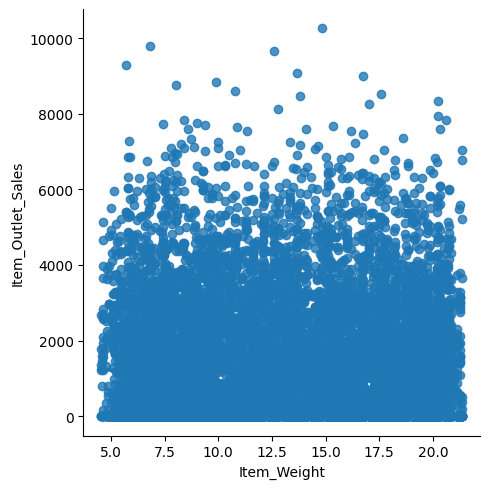

In [34]:
sns.lmplot(x='Item_Weight',y='Item_Outlet_Sales',data=df)

==> Không có mối quan hệ nào giữa trọng lượng mặt hàng và doanh số bán hàng tại cửa hàng.

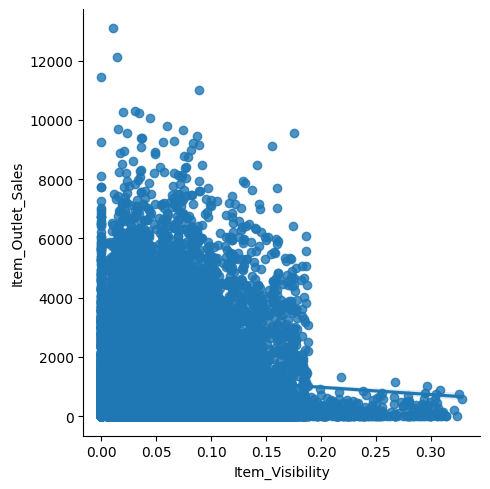

In [36]:
sns.lmplot(x='Item_Visibility',y='Item_Outlet_Sales',data=df)

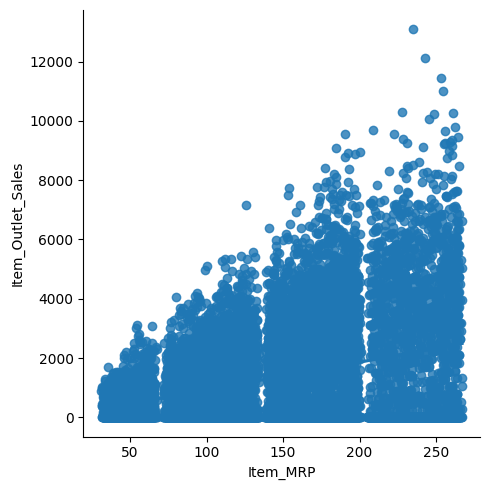

In [37]:
sns.lmplot(x='Item_MRP',y='Item_Outlet_Sales',data=df)

==> Khi giá trị của một mặt hàng tăng lên thì doanh số bán hàng tại cửa hàng cũng tăng lên.

### Phân tích đa biến

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

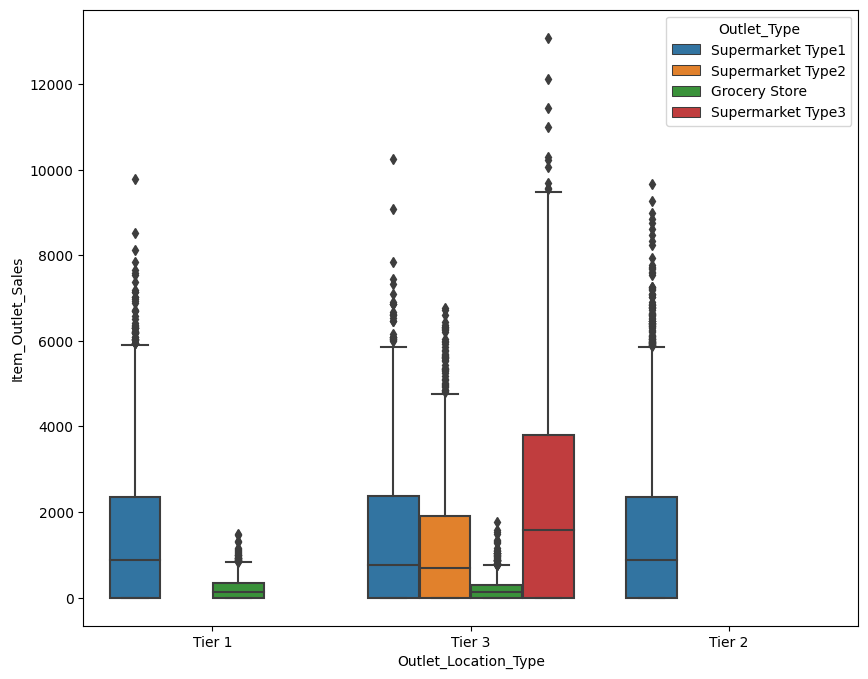

In [39]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'Outlet_Location_Type',y ='Item_Outlet_Sales',hue='Outlet_Type',data=df)

==> Các địa điểm cấp 3 có doanh số bán hàng cao nhất. Cũng có thể thấy rằng họ có hầu hết các loại cửa hàng nên doanh số bán hàng cao hơn

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

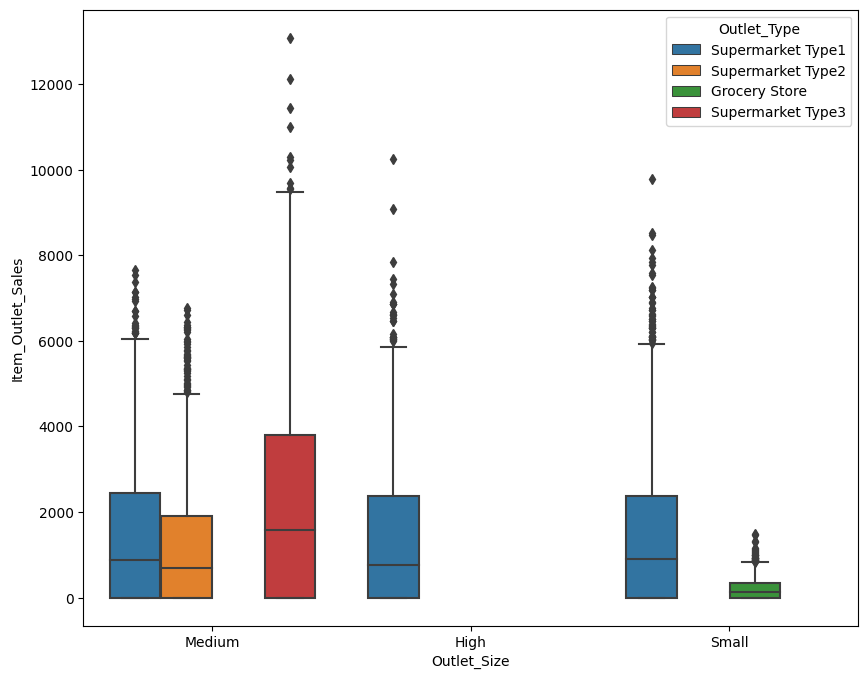

In [41]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'Outlet_Size',y = 'Item_Outlet_Sales',hue='Outlet_Type',data=df)

==> Có thể thấy rằng các cửa hàng cỡ vừa bán được nhiều nhất và cũng có nhiều loại cửa hàng nhất nên doanh số bán hàng càng tăng cao hơn

<Axes: xlabel='Item_Visibility', ylabel='Item_MRP'>

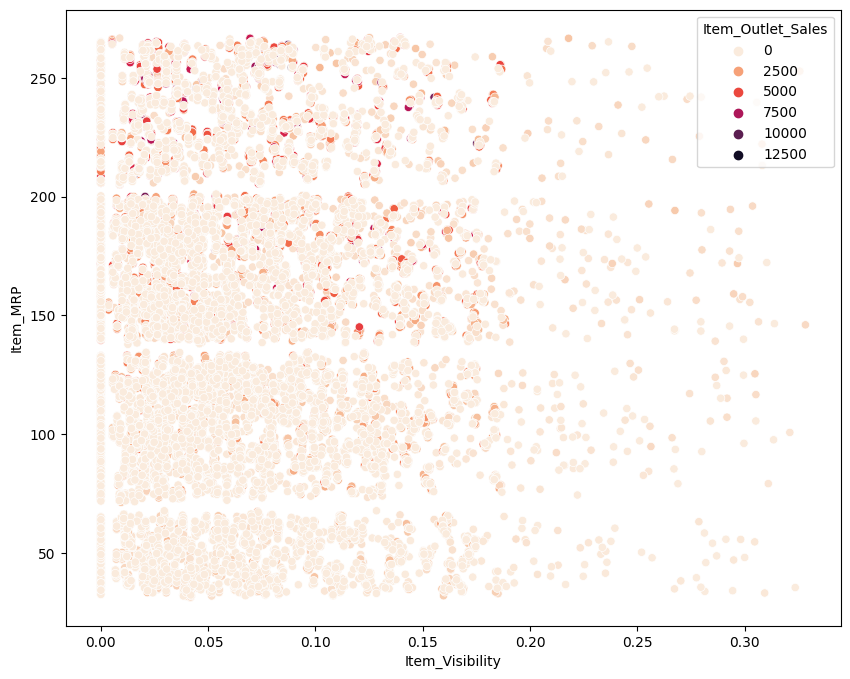

In [42]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Item_Visibility',y = 'Item_MRP',hue='Item_Outlet_Sales',data=df,palette='rocket_r')

<Axes: >

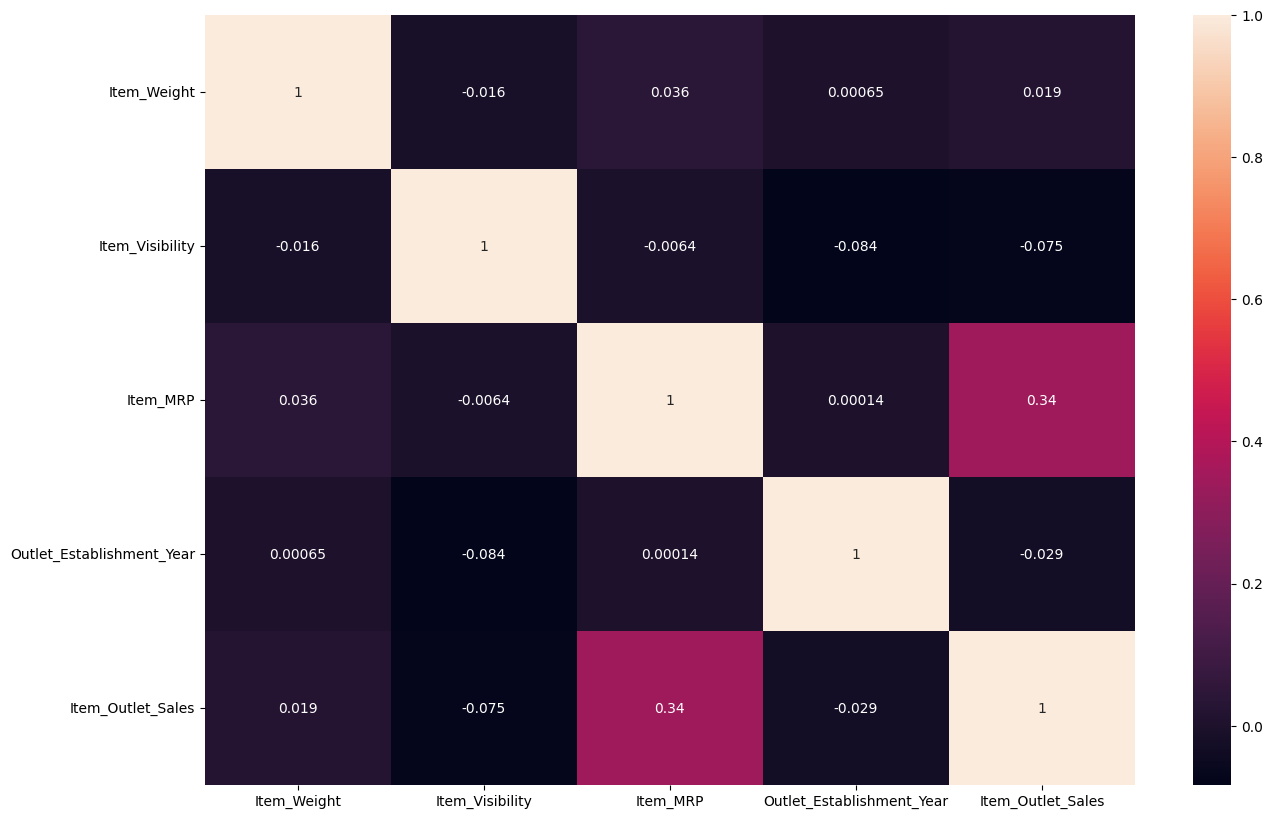

In [43]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

==> MRP có mối tương quan tích cực mạnh nhất với Doanh số bán hàng, trong khi tính khả thi và thành lập cho thấy mối tương quan tiêu cực một chút. Không có nhiều mối tương quan giữa các tính năng độc lập.

### xử lý dữ liệu

In [44]:
# cột Item_Visibility:
feature = "Item_Visibility"
df[feature].replace(0, np.nan, inplace = True)
display(df[feature].value_counts())

0.077169    3
0.076841    3
0.076483    3
0.077290    3
0.076856    3
           ..
0.162572    1
0.014826    1
0.058034    1
0.043786    1
0.104720    1
Name: Item_Visibility, Length: 13005, dtype: int64

In [45]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.018540,0.036236,0.000645,0.019447
Item_Visibility,-0.018540,1.000000,-0.009230,-0.091455,-0.080968
Item_MRP,0.036236,-0.009230,1.000000,0.000141,0.342781
Outlet_Establishment_Year,0.000645,-0.091455,0.000141,1.000000,-0.029489
Item_Outlet_Sales,0.019447,-0.080968,0.342781,-0.029489,1.000000


In [46]:

import association_metrics as am
corrdf = df[categorical].copy()
corrdf = corrdf.apply(
        lambda x: x.astype("category") if x.dtype == "O" else x)
cramersv = am.CramersV(corrdf) 
categoric_corr_matrix = cramersv.fit()
display(categoric_corr_matrix)

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Fat_Content,1.000000,0.215021,0.024022,0.015573,0.008796,0.015832
Item_Type,0.215021,1.000000,0.008476,0.007095,0.006881,0.011276
Outlet_Identifier,0.024022,0.008476,1.000000,1.000000,1.000000,1.000000
Outlet_Size,0.015573,0.007095,1.000000,1.000000,0.578765,0.552700
Outlet_Location_Type,0.008796,0.006881,1.000000,0.578765,1.000000,0.526540
Outlet_Type,0.015832,0.011276,1.000000,0.552700,0.526540,1.000000


In [47]:
table = df.pivot_table(values = feature, index = "Item_Type", columns = "Outlet_Type", aggfunc = "mean")
table

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Type,,,,
Baking Goods,0.116306,0.066692,0.068206,0.066524
Breads,0.111612,0.067579,0.067976,0.066038
Breakfast,0.126056,0.079993,0.083079,0.078609
Canned,0.112484,0.066167,0.064655,0.067549
Dairy,0.120742,0.069299,0.069000,0.069213
Frozen Foods,0.115895,0.065449,0.064184,0.064816
Fruits and Vegetables,0.114820,0.067123,0.067503,0.066758
Hard Drinks,0.109913,0.064873,0.063611,0.065297
Health and Hygiene,0.098924,0.055021,0.053081,0.054924


In [48]:
Replacement_IndexSeries = df[df[feature].isnull()].apply(lambda rows: table.loc[rows["Item_Type"], rows["Outlet_Type"]], axis=1)
df[feature].fillna(Replacement_IndexSeries, inplace=True)

In [49]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64


==> Thay giá trị bị thiếu của cột Item_Visibility bằng mean

In [50]:
# cột 'Item_Weight'

feature = "Item_Weight"
wt_table = df.pivot_table(values='Item_Weight', index='Item_Identifier', aggfunc= 'mean')
wt_table

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [51]:
Replacement_IndexSeries = df[df[feature].isnull()].apply(lambda rows: wt_table.loc[rows["Item_Identifier"], feature], axis=1)
df[feature].fillna(Replacement_IndexSeries, inplace=True)

In [52]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [53]:
# cột Outlet_Size

feature = "Outlet_Size"
print("NaN \t", df[feature].isnull().sum())
df[feature].value_counts()

NaN 	 4016


Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [54]:
df[df["Outlet_Size"].isnull()][["Outlet_Identifier"]]

,Outlet_Identifier
3,OUT010
8,OUT045
9,OUT017
25,OUT017
28,OUT010
...,...
14191,OUT010
14193,OUT017
14201,OUT045
14202,OUT017


In [55]:
df['Outlet_Size'].replace(np.NaN,'Unknown',inplace=True)

In [56]:
df['Outlet_Size'].value_counts()

Medium     4655
Unknown    4016
Small      3980
High       1553
Name: Outlet_Size, dtype: int64

In [58]:
from scipy.stats import mode

# Sử dụng pivot_table với np.unique
size_table = df.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=(lambda x: np.unique(x, return_counts=True)[0][np.argmax(np.unique(x, return_counts=True)[1])]))

# Hiển thị bảng tổng hợp
print(size_table)

                  Outlet_Size
Outlet_Type                  
Grocery Store         Unknown
Supermarket Type1       Small
Supermarket Type2      Medium
Supermarket Type3      Medium


In [59]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

In [60]:
# cột Item_Identifier

df['Item_Identifier'].value_counts()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [61]:
df['Item_Identifier']=df['Item_Identifier'].apply(lambda x: x[:-2])

In [62]:
df['Item_Identifier'].unique()

array(['FDA', 'DRC', 'FDN', 'FDX', 'NCD', 'FDP', 'FDO', 'FDH', 'FDU',
       'FDY', 'FDS', 'FDF', 'NCB', 'DRI', 'FDW', 'FDC', 'FDR', 'FDV',
       'DRJ', 'FDE', 'NCS', 'DRH', 'NCX', 'DRZ', 'FDB', 'FDK', 'FDL',
       'FDM', 'NCP', 'NCL', 'DRK', 'FDI', 'FDZ', 'NCI', 'FDJ', 'FDG',
       'NCZ', 'FDQ', 'FDD', 'DRG', 'NCR', 'FDT', 'DRB', 'DRE', 'DRA',
       'NCF', 'NCH', 'NCO', 'NCN', 'NCC', 'DRD', 'DRF', 'DRL', 'NCM',
       'NCU', 'DRY', 'NCW', 'DRM', 'NCT', 'NCQ', 'DRP', 'DRQ', 'NCK',
       'NCY', 'DRN', 'NCA', 'NCE', 'NCJ', 'NCV', 'NCG', 'DRO'],
      dtype=object)

==> Bây giờ cột Item_Identifier trông có ý nghĩa hơn.

In [64]:
# cột 'Outlet_Establishment_Year'

df['Outlet_Establishment_Year']=(2024.0 - df['Outlet_Establishment_Year'])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,25.0,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,15.0,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,25.0,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX,19.20,Regular,0.114820,Fruits and Vegetables,182.0950,OUT010,26.0,Unknown,Tier 3,Grocery Store,732.3800,train
4,NCD,8.93,Low Fat,0.057774,Household,53.8614,OUT013,37.0,High,Tier 3,Supermarket Type1,994.7052,train


In [65]:
# cột Item_Fat_Content

# hợp nhất 'low fat' và 'regular'
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [66]:
df['Item_Fat_Content'].replace('reg','Regular',inplace=True)
df['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat',inplace=True)
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

==> Bây giờ chỉ có hai loại trong cột

In [68]:
# encoding

from sklearn.preprocessing import OrdinalEncoder
e=OrdinalEncoder()

In [69]:
obj=[feature for feature in df.columns if df[feature].dtypes=='O' and feature!='source']
obj

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [70]:
for i in obj:
    df[i]=e.fit_transform(df[i].values.reshape(-1,1))

In [71]:
df.dtypes

Item_Identifier              float64
Item_Weight                  float64
Item_Fat_Content             float64
Item_Visibility              float64
Item_Type                    float64
Item_MRP                     float64
Outlet_Identifier            float64
Outlet_Establishment_Year    float64
Outlet_Size                  float64
Outlet_Location_Type         float64
Outlet_Type                  float64
Item_Outlet_Sales            float64
source                        object
dtype: object

In [72]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,19.0,9.30,0.0,0.016047,4.0,249.8092,9.0,25.0,1.0,0.0,1.0,3735.1380,train
1,2.0,5.92,1.0,0.019278,14.0,48.2692,3.0,15.0,1.0,2.0,2.0,443.4228,train
2,32.0,17.50,0.0,0.016760,10.0,141.6180,9.0,25.0,1.0,0.0,1.0,2097.2700,train
3,42.0,19.20,1.0,0.114820,6.0,182.0950,0.0,26.0,3.0,2.0,0.0,732.3800,train
4,48.0,8.93,0.0,0.057774,9.0,53.8614,1.0,37.0,0.0,2.0,1.0,994.7052,train


==> Tất cả các cột được chuyển đổi thành kiểu float trừ 'source'.

In [73]:
# loại bỏ outlier của 'Item_Visibility'
df=df[np.abs(df.Item_Visibility-df.Item_Visibility.mean())<=(3*df.Item_Visibility.std())]

<Axes: xlabel='Item_Visibility'>

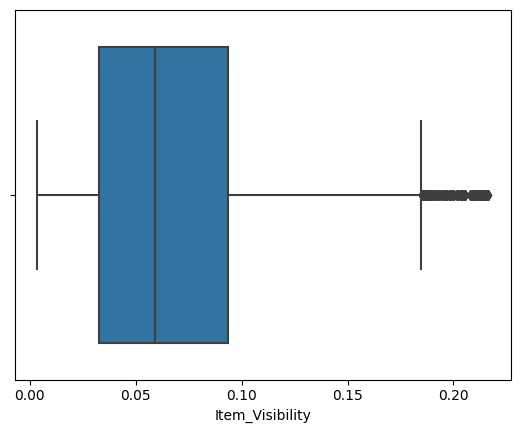

In [74]:
sns.boxplot(x = df['Item_Visibility'])

In [75]:
display(df.shape)
df = df[df['Item_Visibility'] < 0.15]
display(df.shape)

(14023, 13)

(13150, 13)

In [76]:
# xóa skewness của cột visibility
df['Item_Visibility'].skew()

0.553415572715694

In [77]:
df['Item_Visibility']=np.sqrt(df['Item_Visibility'])

In [78]:
df['Item_Visibility'].skew()

0.014668918020177906

<Axes: xlabel='Item_Visibility', ylabel='Density'>

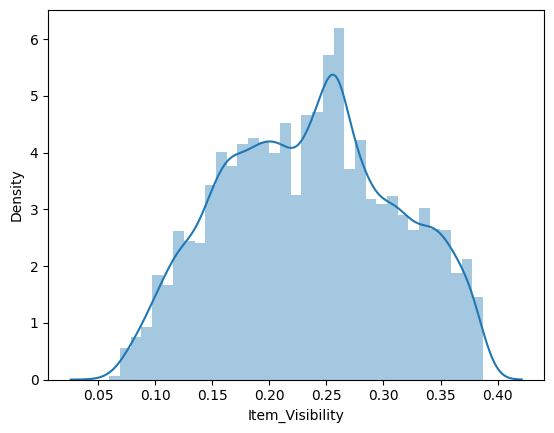

In [79]:
sns.distplot(df['Item_Visibility'])